In [28]:
import tensorflow as tf

import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import log_loss
from matplotlib import pyplot as plt

In [31]:
train = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')
X = train.drop('Activity', axis=1)
y = train.Activity

In [32]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Activity', axis=1), train.Activity, test_size=0.1, random_state=42)

In [43]:
def plot_history(h):
    plt.plot(h.history['accuracy'])
    plt.plot(h.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    plt.plot(h.history['loss'])
    plt.plot(h.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

Epoch 1/120
106/106 [==============================] - 1s 8ms/step - loss: 0.6999 - accuracy: 0.5277 - val_loss: 0.6917 - val_accuracy: 0.5346
Epoch 2/120
106/106 [==============================] - 0s 4ms/step - loss: 0.6922 - accuracy: 0.5375 - val_loss: 0.6909 - val_accuracy: 0.5372
Epoch 3/120
106/106 [==============================] - 0s 4ms/step - loss: 0.6909 - accuracy: 0.5419 - val_loss: 0.6906 - val_accuracy: 0.5372
Epoch 4/120
106/106 [==============================] - 0s 3ms/step - loss: 0.6908 - accuracy: 0.5387 - val_loss: 0.6905 - val_accuracy: 0.5372
Epoch 5/120
106/106 [==============================] - 0s 3ms/step - loss: 0.6898 - accuracy: 0.5446 - val_loss: 0.6904 - val_accuracy: 0.5372
Epoch 6/120
106/106 [==============================] - 0s 3ms/step - loss: 0.6881 - accuracy: 0.5502 - val_loss: 0.6904 - val_accuracy: 0.5372
Epoch 7/120
106/106 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.5434 - val_loss: 0.6904 - val_accuracy: 0.5372

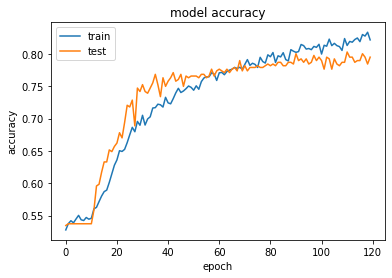

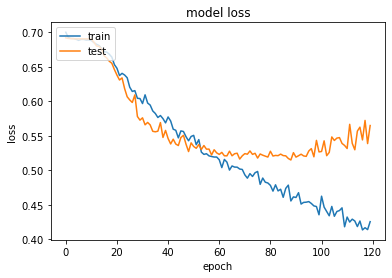

In [47]:

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, input_shape=(len(X.columns),), activation='relu'))
# model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001,momentum=0.9)
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics =['accuracy'])
h = model.fit(X, y, batch_size=32, epochs=120,validation_split=0.1, shuffle=True, verbose=1)

plot_history(h)

In [ ]:
# Install TabNet
%pip install pytorch-tabnet

In [10]:
 # imports necessary modules
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, log_loss

In [8]:
X = train.drop('Activity', axis=1).values
y = train.Activity.values

In [13]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)
CV_score_array    =[]
for train_index, test_index in kf.split(X):
    X_train, X_valid = X[train_index], X[test_index]
    y_train, y_valid = y[train_index], y[test_index]
    tb_cls = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=1e-3),
                       scheduler_params={"step_size":10, "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type="sparsemax" #'entmax'
                       )
    tb_cls.fit(X_train,y_train,
               eval_set=[(X_train, y_train), (X_valid, y_valid)],
               eval_name=['train', 'valid'],
               eval_metric=['accuracy'],
               max_epochs=1000 , patience=100,
               batch_size=28, drop_last=False)            
    CV_score_array.append(tb_cls.best_cost)
  
# Test model and generate prediction
predictions =[ 'N' if i < 0.5 else 'Y' for i in tb_cls.predict(X_test)]


Device used : cpu
epoch 0  | loss: 0.87437 | train_accuracy: 0.469   | valid_accuracy: 0.42743 |  0:00:06s
epoch 1  | loss: 0.79435 | train_accuracy: 0.48133 | valid_accuracy: 0.44474 |  0:00:13s
epoch 2  | loss: 0.79575 | train_accuracy: 0.499   | valid_accuracy: 0.47004 |  0:00:20s
epoch 3  | loss: 0.76284 | train_accuracy: 0.509   | valid_accuracy: 0.50866 |  0:00:26s
epoch 4  | loss: 0.75953 | train_accuracy: 0.52967 | valid_accuracy: 0.49534 |  0:00:33s
epoch 5  | loss: 0.74213 | train_accuracy: 0.522   | valid_accuracy: 0.47403 |  0:00:39s
epoch 6  | loss: 0.73827 | train_accuracy: 0.538   | valid_accuracy: 0.5486  |  0:00:46s
epoch 7  | loss: 0.72705 | train_accuracy: 0.54567 | valid_accuracy: 0.51265 |  0:00:52s
epoch 8  | loss: 0.72476 | train_accuracy: 0.54367 | valid_accuracy: 0.5273  |  0:00:59s
epoch 9  | loss: 0.71939 | train_accuracy: 0.53033 | valid_accuracy: 0.50599 |  0:01:06s
epoch 10 | loss: 0.70829 | train_accuracy: 0.51667 | valid_accuracy: 0.52996 |  0:01:13s
epo

NameError: name 'X_test' is not defined

In [34]:
predictions =[ 'N' if i < 0.5 else 'Y' for i in tb_cls.predict(X_valid)]

In [25]:
probas = tb_cls.predict_proba(test.values)[:,1]
submission = pd.DataFrame({'MoleculeId':[x for x in range(1,len(test)+1)],'PredictedProbability':probas})
submission.to_csv('submission_tabnet.csv',index=False)

In [27]:
tb_cls.save_model("tabnet.pkl")

Successfully saved model at tabnet.pkl.zip


'tabnet.pkl.zip'